# Intro to Regression 01

## Regression Problem

### Your name :     

### Kaggle Link :
* [Bike-sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)
* [boston-housing](https://www.kaggle.com/c/boston-housing)

#### 실습목표 I<br>
1. Linear Regression 을 이해하고 사용해본다.
2. KNN Regression 을 이해하고 사용해본다.
3. Artificial Neural Network Regression을 이해하고 사용해본다.

#### 실습목표 II<br>
1. Pandas 라이브러리로 csv 파일을 불러오고, 전처리할 수 있다.
2. Pandas로 전처리한 파일을 Numpy array로 바꿀 수 있다.
3. Scikit-learn을 통해 간단히 머신러닝을 사용해볼 수 있다.

---------------
Rayleigh Kim


In [ ]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,
세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.
'''


'\n사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,\n세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.\n'

## 다같이 실습

### Data Loading

In [ ]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [ ]:
# # hour.csv 파일을 불러오자
# from google.colab import files
# files.upload()

In [ ]:
# rides = pd.read_csv('hour.csv')

In [ ]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
type(rides)

pandas.core.frame.DataFrame

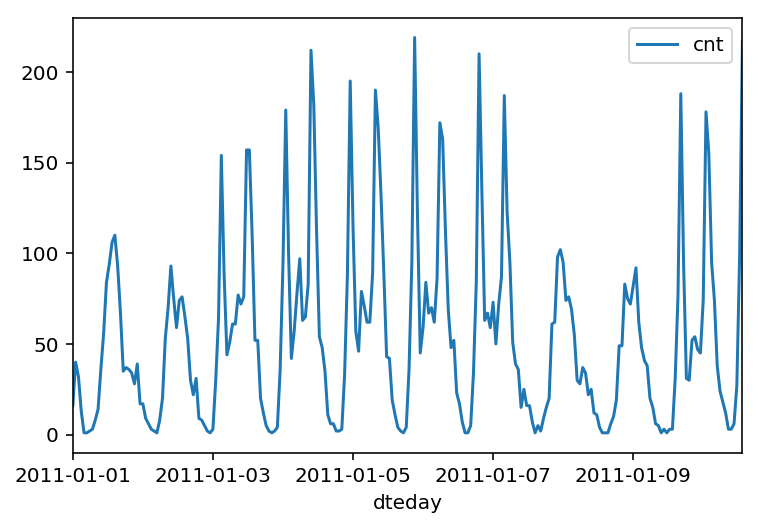

In [ ]:
rides[:24*10].plot(x='dteday', y='cnt')

#### 참고

시간별로 집계한 자전거 sharing 데이터는 지금, rides라는 변수안에 Pandas Dataframe 형태로 저장되어 있다. 간단하게 Pandas를 사용해보자

In [ ]:
rides['instant']

In [ ]:
rides[['instant', 'dteday']]

,instant,dteday
0,1,2011-01-01
1,2,2011-01-01
2,3,2011-01-01
3,4,2011-01-01
4,5,2011-01-01
5,6,2011-01-01
6,7,2011-01-01
7,8,2011-01-01
8,9,2011-01-01
9,10,2011-01-01


In [ ]:
columns = ['instant', 'dteday']
rides[columns]

,instant,dteday
0,1,2011-01-01
1,2,2011-01-01
2,3,2011-01-01
3,4,2011-01-01
4,5,2011-01-01
5,6,2011-01-01
6,7,2011-01-01
7,8,2011-01-01
8,9,2011-01-01
9,10,2011-01-01


In [ ]:
rides[:24]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
rides.ix[0:24, [2,5]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,season,hr
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


### Dummy Variable

Season, weathersit, mnth, hr, weekday 등의 Categorical Variable들은 모델에 넣기 전에 Binary dummy variable로 만들 필요가 있다.

그리고 사용하지 않을 변수들은 제거하자.


익혀야 할 방법들
pd.get_dummies, pd.concat, (Pandas Dataframe).drop

In [ ]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Scaling target variables

mean shifting & Scaling : 평균을 0으로, 표준편차를 1로<br>
사실 scikit-learn에서 한방에 하는 방법도 있다.<br>
[Missing-Value처리](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html), [StandardScaling](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)<br>
연습삼아 직접 해보자!



In [ ]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [ ]:
'''
위에서 쓰인 Dictionary 잠깐 짚어보기.
Dictionary의 각각의 원소는 key : value 쌍으로 되어 있다.
'''

scaled_features

{'casual': [35.67621842453536, 49.305030387053186],
 'cnt': [189.46308763450142, 181.38759909186527],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'registered': [153.78686920996606, 151.35728591258317],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

### Splitting the data into training, testing, and validation sets

맨 마지막의 21일을 test_set으로, 그리고 마지막의 81~22 (60일)을 validation set으로, 나머지를 Training set으로 둔다.<br>
물론 이것도 [scikit-learn에서 한방](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)에 할 수 있으나 우리는 직접한다!

굳이 Validations set을 왜 사용하는지는, 이론만 달리는 날에 신나고 자세하게 달립시다!

In [ ]:
test_data = data[-21*24:]
val_data = data[-81*24:-21*24]
train_data = data[:-81*24]

target_fields = ['cnt', 'casual', 'registered']
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target_fields]
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

train_targets.head()

,cnt,casual,registered
0,-0.956312,-0.662736,-0.930162
1,-0.823998,-0.561326,-0.804632
2,-0.868103,-0.622172,-0.837666
3,-0.972851,-0.662736,-0.949983
4,-1.039008,-0.723582,-1.009445


### Pandas Dataframe to Numpy array

Scikit-learn 만 사용한다면 사실 필요없을 수 있는 과정이다. 하지만, 차후 Tensorflow로 넘어간다면 Numpy를 사용해야만 한다. (Pandas데이터 타입을 받질 못한다.)<br>
사실 링크된 Scikit-learn의 문서들을 보면 눈치챘을 수도 있는데, 거의 Numpy하고만 같이 사용되고 있다!<br>
[values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html)라는 방법을 사용할 것이다.

In [ ]:
test_features, test_targets = test_features.values, test_targets.values
val_features, val_targets = val_features.values, val_targets.values
train_features, train_targets = train_features.values, train_targets.values

# 우리는 타겟 중 첫번째 컬럼(cnt)만 사용할 것이다.
test_cnt = test_targets[:,0]
val_cnt = val_targets[:,0]
train_cnt = train_targets[:,0]


print(train_targets, train_cnt)

[[-0.95631172 -0.662736   -0.93016249]
 [-0.82399838 -0.56132647 -0.80463169]
 [-0.86810283 -0.62217218 -0.83766611]
 ...
 [-0.82399838 -0.6830179  -0.76499039]
 [-0.07973581 -0.662736    0.12033204]
 [ 1.75059879 -0.54104456  2.27417616]] [-0.95631172 -0.82399838 -0.86810283 ... -0.82399838 -0.07973581
  1.75059879]


### Model Training : Simple Linear Regression

이제 데이터가 다 준비가 되었다!

해보자! 모델링!

In [ ]:
'''
단순한 multivariate regression을 해보자!
'''
import time # 학습시간 측정용
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 모델 준비
simple_regression = linear_model.LinearRegression()

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
simple_regression.fit(train_features, train_cnt )
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

# Training & Validation set에서의 예측값 준비
train_pred, val_pred = simple_regression.predict(train_features), simple_regression.predict(val_features)

----  0.08415sec, training complete  ----


In [ ]:
# Training & Validation set에서의 성능 확인

print("Mean Squared Error on Training set : {0:.5f}".format(mean_squared_error(train_cnt, train_pred)  ))
print("Mean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(val_cnt, val_pred)  ))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(train_cnt, train_pred)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(val_cnt, val_pred)))

Mean Squared Error on Training set : 0.30119
Mean Squared Error on Validation set : 0.46282
R-squared Score on Training set : 0.69078
R-squared Score on Validation set : 0.64129


### Check out on Test set

Golden rule : Test set을 모델 학습에 사용하지 말지어다.

Mean Squared Error on Test set : 0.36110
R-squared Score on Test set : 0.45514


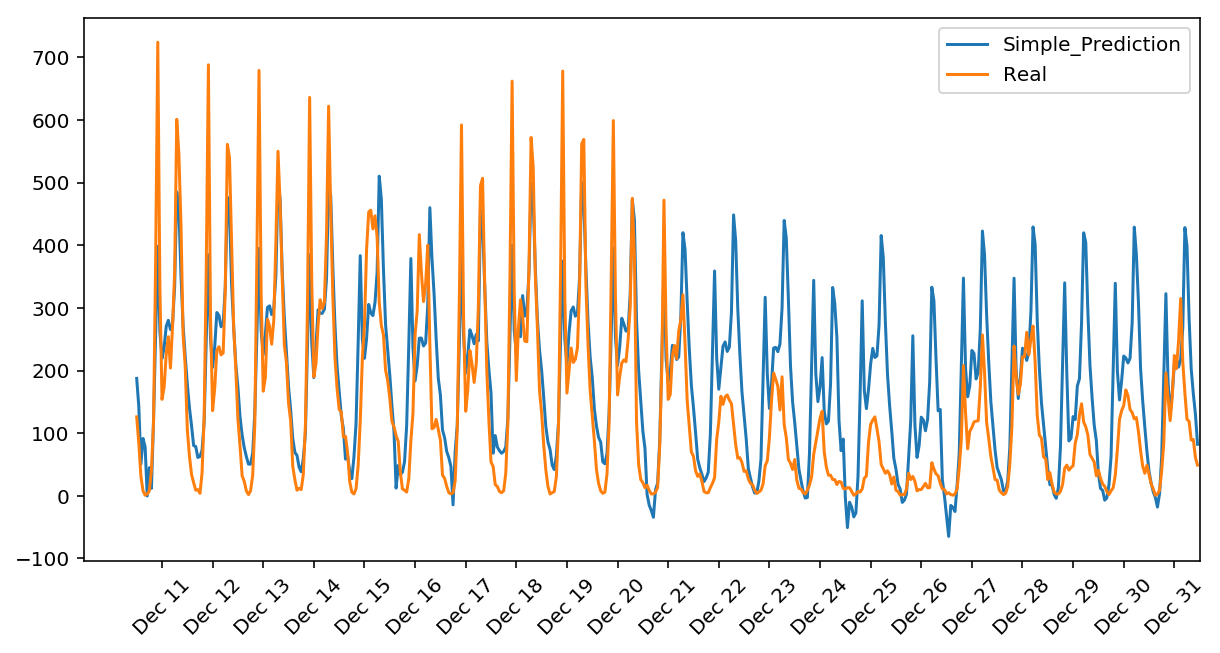

In [ ]:
simple_predictions = simple_regression.predict(test_features)

fig, ax = plt.subplots(figsize=(10,5))

# 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features['cnt']

ax.plot((simple_predictions)*std+mean, label = 'Simple_Prediction')
ax.plot((test_cnt)*std+mean, label = 'Real')
ax.set_xlim(right = len(simple_predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

print("Mean Squared Error on Test set : {0:.5f}".format(mean_squared_error(test_cnt, simple_predictions)  ))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_cnt, simple_predictions)))

### Model Training : KNN Regression

[K-Nearest Neighbors Regression](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)


In [ ]:
'''
Nearest-Neighbor Regression
'''

import time # 학습시간 측정용
from sklearn import neighbors

In [ ]:
# 모델 준비
knn_regression = neighbors.KNeighborsRegressor(n_neighbors=5)

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
knn_regression.fit(train_features, train_cnt)
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

# Training & Validation set에서의 예측값 준비
train_pred2, val_pred2 = knn_regression.predict(train_features), knn_regression.predict(val_features)

----  0.04220sec, training complete  ----


In [ ]:
# Training & Validation set에서의 성능 확인

print("Mean Squared Error on Training set : {0:.5f}".format(mean_squared_error(train_cnt, train_pred2)  ))
print("Mean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(val_cnt, val_pred2)  ))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(train_cnt, train_pred2)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(val_cnt, val_pred2)))

Mean Squared Error on Training set : 0.20454
Mean Squared Error on Validation set : 0.64174
R-squared Score on Training set : 0.79001
R-squared Score on Validation set : 0.50262


Mean Squared Error on Test set : 0.33853
R-squared Score on Test set : 0.48919


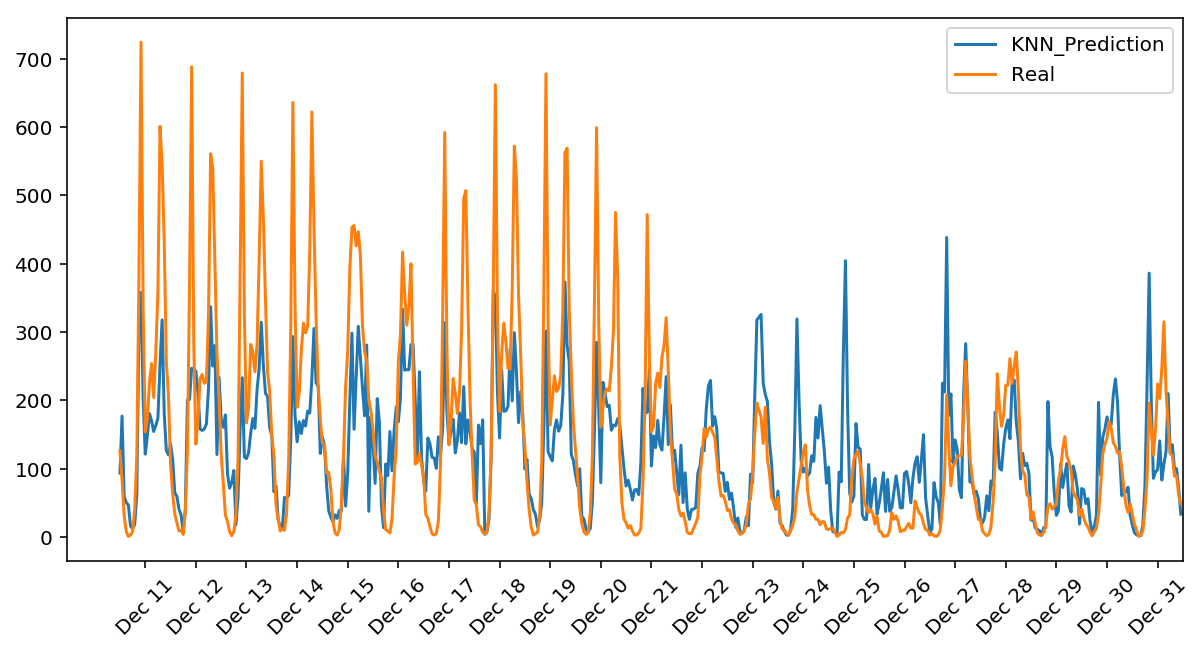

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

knn_predictions = knn_regression.predict(test_features)

# 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features['cnt']

ax.plot(knn_predictions*std +mean, label = 'KNN_Prediction')
ax.plot((test_cnt)*std+mean, label = 'Real')
ax.set_xlim(right = len(simple_predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

print("Mean Squared Error on Test set : {0:.5f}".format(mean_squared_error(test_cnt, knn_predictions)  ))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_cnt, knn_predictions)))

## 스스로 실습 01

이걸로 끝이 아니다.

위와 같은 과정을 싸이킷런의

[Support Vector Machine Regression](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR),  [Decision Tree Regression](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor), 

에도 적용하고 눈으로 확인해보자! 위 링크의 하단에는 각각 Examples가 있으니 적극활용해보자

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----  2.66506sec, training complete  ----
Mean Squared Error on Training set : 0.05199
Mean Squared Error on Validation set : 0.17218
R-squared Score on Training set : 0.94663
R-squared Score on Validation set : 0.86655
Mean Squared Error on Test set : 0.30963
R-squared Score on Test set : 0.53280


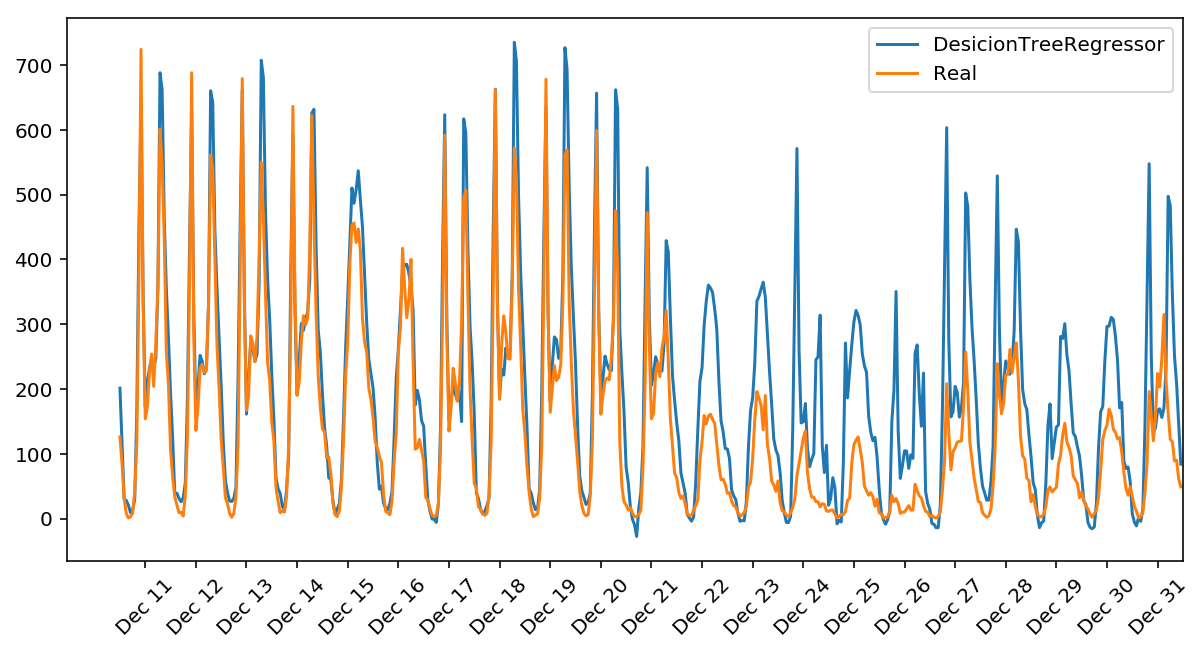

In [ ]:
#knn_regression = DecisionTreeRegressor()
knn_regression = MLPRegressor(hidden_layer_sizes=(10,))

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
knn_regression.fit(train_features, np.reshape(train_cnt, (-1, 1)))
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

# Training & Validation set에서의 예측값 준비
train_pred2, val_pred2 = knn_regression.predict(train_features), knn_regression.predict(val_features)

# Training & Validation set에서의 성능 확인

print("Mean Squared Error on Training set : {0:.5f}".format(mean_squared_error(train_cnt, train_pred2)  ))
print("Mean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(val_cnt, val_pred2)  ))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(train_cnt, train_pred2)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(val_cnt, val_pred2)))

fig, ax = plt.subplots(figsize=(10,5))

knn_predictions = knn_regression.predict(test_features)

# 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features['cnt']

ax.plot(knn_predictions*std +mean, label = 'DesicionTreeRegressor')
ax.plot((test_cnt)*std+mean, label = 'Real')
ax.set_xlim(right = len(simple_predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

print("Mean Squared Error on Test set : {0:.5f}".format(mean_squared_error(test_cnt, knn_predictions)  ))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_cnt, knn_predictions)))

위 방식들의 Regression이 끝이 나면 우리는 단순한 뉴럴네트워크를 이용한 Regression으로 넘어간다. [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)와 [Neural Network models (supervised)](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)를 적극 참고하자

In [ ]:
'''
사용한 컬럼의 갯수가 56개이다!
'''

train_features.shape

(15435, 56)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# 모델 준비
'''
히든 레이어의 사이즈를 가지고 놀아보자. 학습하는데 시간을 측정해도 좋다.
'''
neural_regression = MLPRegressor(hidden_layer_sizes=(16),
                                activation = 'relu',
                                solver = 'adam',
                                learning_rate_init = 0.0001, #0.00001
                                max_iter = 500,
                                 random_state=2018
                                )

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
neural_regression.fit(train_features, train_cnt )
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))


# Training & Validation set에서의 예측값 준비
train_pred2, val_pred2 = neural_regression.predict(train_features), neural_regression.predict(val_features)



----  7.03390sec, training complete  ----


In [ ]:
# Training & Validation set에서의 성능 확인

print("Mean Squared Error on Training set : {0:.5f}".format(mean_squared_error(train_cnt, train_pred2)  ))
print("Mean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(val_cnt, val_pred2)  ))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(train_cnt, train_pred2)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(val_cnt, val_pred2)))

Mean Squared Error on Training set : 0.06243
Mean Squared Error on Validation set : 0.18163
R-squared Score on Training set : 0.93590
R-squared Score on Validation set : 0.85923


Mean Squared Error on Test set : 0.23093
R-squared Score on Test set : 0.65156


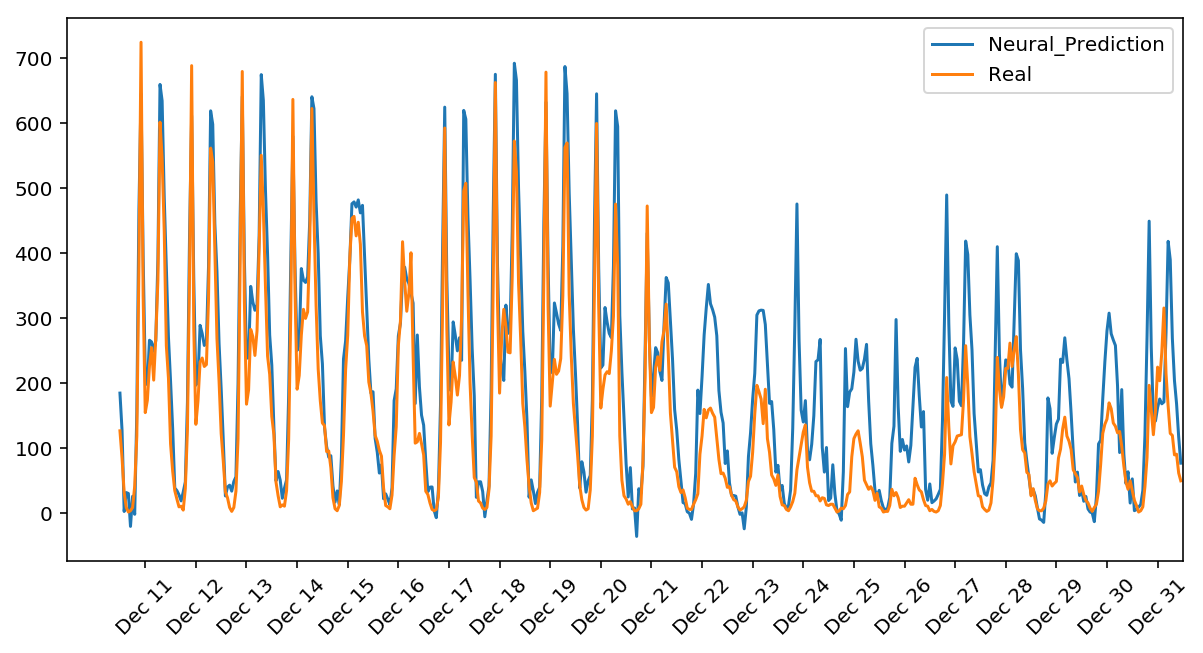

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

# 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features['cnt']
neural_predictions = neural_regression.predict(test_features)

ax.plot(neural_predictions*std+mean, label = 'Neural_Prediction')
ax.plot((test_cnt)*std+mean, label = 'Real')
ax.set_xlim(right = len(neural_predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

print("Mean Squared Error on Test set : {0:.5f}".format(mean_squared_error(test_cnt, neural_predictions)  ))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_cnt, neural_predictions)))

## 스스로 실습 02

캐글의 입문 컴페티션중 하나인 [Boston House prices](https://www.kaggle.com/c/boston-housing)
데이터 셋을 가지고 집값을 예측해보자!




뉴럴넷을 이용한 회귀모델과, 다른 방식을 이용한 회귀모델을 만들어보자

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape,  boston.target.shape)
'''
feature 데이터는 boston.data에
target 데이터는 boston.target에 불러와진다.

scikit-learn에서는 datasets 안에 미리 연습용 데이터셋을 가지고 있다!
'''

(506, 13) (506,)


'\nfeature 데이터는 boston.data에\ntarget 데이터는 boston.target에 불러와진다.\n\nscikit-learn에서는 datasets 안에 미리 연습용 데이터셋을 가지고 있다!\n'